# ERT (Electrical Resistivity Tomography)

- Emmanuel Castillo & Nadine Ushakov
- emmanuel.castillotaborda@utallas.edu & nadine.igonin@utdallas.edu

# Installation

In [ ]:
!apt-get update
!apt-get install -y \
    build-essential \
    libopenblas-dev \
    libsuitesparse-dev \
    libboost-all-dev \
    cmake \
    python3-dev
!pip uninstall -y \
  numpy numba pytensor jax jaxlib tensorflow spacy pymc librosa \
  dask-cuda umap-learn pynndescent cudf-cu12 stumpy shap \
  tensorflow-decision-forests chex cuml-cu12 dopamine-rl \
  orbax-checkpoint optax flax dask-cudf-cu12 raft-dask-cu12 tsfresh
!pip install --no-deps pgcore==1.5.0
!pip install numpy==1.26.4
!pip install --no-deps pygimli==1.5.4
import os
os._exit(00)

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,953 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,246 kB]
Get:13 https://developer.download.nvidia.com/compute/c

## First test
Be sure to have libcholmod.so.3 or libumfpack.so.5. Otherwise you can create symbolic links as described here: https://github.com/gimli-org/gimli/issues/761#issuecomment-2315873346

In [1]:
import os

# List of required shared libraries with full paths
required_libs = [
    "/usr/lib/x86_64-linux-gnu/libcholmod.so.3",
    "/usr/lib/x86_64-linux-gnu/libumfpack.so.5"
]

for lib in required_libs:
    assert os.path.exists(lib), f"Required library not found: {lib}"

print(f"All required shared libraries are present: {required_libs}")

All required shared libraries are present: ['/usr/lib/x86_64-linux-gnu/libcholmod.so.3', '/usr/lib/x86_64-linux-gnu/libumfpack.so.5']


## Second test

- expected_pygimli_version = "1.5.4"
- expected_numpy_version = "1.26.4"

In [2]:
import pygimli
import numpy

expected_pygimli_version = "1.5.4"
expected_numpy_version = "1.26.4"

print("pyGIMLi version:", pygimli.__version__)
print("numpy version:", numpy.__version__)

assert pygimli.__version__ == expected_pygimli_version, f"Expected pyGIMLi {expected_pygimli_version} but got {pygimli.__version__}"
assert numpy.__version__ == expected_numpy_version, f"Expected numpy {expected_numpy_version} but got {numpy.__version__}"

pyGIMLi version: 1.5.4
numpy version: 1.26.4


...ready to work with pygimli!

# Clone our repository

In [3]:
! git clone https://github.com/ecastillot/FieldCampII_2025.git /content/FieldCampII_2025

Cloning into '/content/FieldCampII_2025'...
remote: Enumerating objects: 183, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (57/57), done.
remote: Total 183 (delta 21), reused 60 (delta 11), pack-reused 111 (from 3)
Receiving objects: 100% (183/183), 334.58 MiB | 17.58 MiB/s, done.
Resolving deltas: 100% (24/24), done.
Updating files: 100% (112/112), done.


In [4]:
import sys
lib = "/content/FieldCampII_2025"
sys.path.append(lib)

 # Reading the data

We created some useful functions to upload the data for you. You can use them only importing fc2 library (field camp 2)

In [5]:
from fc2 import ert as fc2_ert # this is a library we built for you to us
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## STG Data

The file with **format .stg** is created by SuperString, and it contains the result of a resistivity measurement. Check **Section 7** in the manual here:

 https://github.com/ecastillot/FieldCampII_2025/blob/main/data/ROC_ERT_032625/AGI-SuperStingManual.pdf

 We created a function to read the file for you

In [6]:
print(help(fc2_ert.parse_stg))

Help on function parse_stg in module fc2.ert:

parse_stg(filepath, join_date_time=True)
    Read a .stg file exported from SuperSting and return a pandas DataFrame.
    
    Parameters:
        filepath (str): Path to the .stg file.
        join_date_time (bool): If True, combine date and time into a single datetime object in 'date_time' column.
    
    Returns:
        pd.DataFrame: Parsed .stg data.

None


In [28]:
# change this path to load your own data
stg_filepath = "/content/FieldCampII_2025/data/ROC_ERT_032625/ROC2025.stg"

# Load the STG file
stg = fc2_ert.parse_stg(stg_filepath)
display(stg.head())
print("Columns:", stg.columns.tolist())
stg.to_csv("stg.csv", index=False) # in case you want to export it

,record_num,user,date_time,V/I,error_percent_tenths,current_mA,resistivity,command_id,Ax,Ay,...,Nz,ip_time_slot_ms,ip_time_constant,ip_slot1,ip_slot2,ip_slot3,ip_slot4,ip_slot5,ip_slot6,ip_total
0,1,USER,2025-03-26 10:07:56,0.564647,19,299,15.9650,ROC2025,1.5,0.0,...,0.0,100,500,0.000138,0.000056,0.000063,0.000044,0.000019,0.000031,0.000350
1,2,USER,2025-03-26 10:08:18,0.123888,32,301,14.0114,ROC2025,1.5,0.0,...,0.0,100,500,0.000486,0.000258,-0.000182,0.000379,0.000212,0.000121,0.001274
2,3,USER,2025-03-26 10:08:40,0.052938,50,303,14.9679,ROC2025,1.5,0.0,...,0.0,100,500,-0.000211,0.000457,-0.000542,0.001000,-0.000372,0.000417,0.000749
3,4,USER,2025-03-26 10:09:03,0.031073,58,304,17.5715,ROC2025,1.5,0.0,...,0.0,100,500,-0.000154,0.000300,0.000907,-0.001205,0.001423,0.000904,0.002174
4,5,USER,2025-03-26 10:09:25,0.011693,19,305,11.5712,ROC2025,1.5,0.0,...,0.0,100,500,0.000777,0.000300,0.000175,0.000209,0.000238,0.000310,0.002009


Columns: ['record_num', 'user', 'date_time', 'V/I', 'error_percent_tenths', 'current_mA', 'resistivity', 'command_id', 'Ax', 'Ay', 'Az', 'Bx', 'By', 'Bz', 'Mx', 'My', 'Mz', 'Nx', 'Ny', 'Nz', 'ip_time_slot_ms', 'ip_time_constant', 'ip_slot1', 'ip_slot2', 'ip_slot3', 'ip_slot4', 'ip_slot5', 'ip_slot6', 'ip_total']


Review the summary. (Notice the values of Ay, Az,By,Bz,My, Mz)

In [29]:
stg[["current_mA","resistivity","Ax","Ay","Az","Bx","By","Bz","Mx","My","Mz","Nx","Ny","Nz"]].describe()

,current_mA,resistivity,Ax,Ay,Az,Bx,By,Bz,Mx,My,Mz,Nx,Ny,Nz
count,170.000000,170.000000,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0,170.000000,170.0,170.0
mean,349.052941,14.305113,7.641176,0.0,0.0,8.611765,0.0,0.0,13.305882,0.0,0.0,15.441176,0.0,0.0
std,34.393178,16.024277,4.543421,0.0,0.0,6.560315,0.0,0.0,4.657242,0.0,0.0,4.956564,0.0,0.0
min,262.000000,-94.752200,0.000000,0.0,0.0,0.000000,0.0,0.0,1.500000,0.0,0.0,3.000000,0.0,0.0
25%,321.000000,11.884000,4.500000,0.0,0.0,3.000000,0.0,0.0,10.500000,0.0,0.0,12.000000,0.0,0.0
50%,349.000000,14.579700,7.500000,0.0,0.0,7.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0
75%,370.000000,16.509450,10.500000,0.0,0.0,13.500000,0.0,0.0,16.500000,0.0,0.0,19.500000,0.0,0.0
max,452.000000,101.551000,19.500000,0.0,0.0,22.500000,0.0,0.0,21.000000,0.0,0.0,22.500000,0.0,0.0


let's check the resistivity. Negative values usually indicate: Instrumental error, bad or noisy data (e.g., poor electrode contact or external interference)

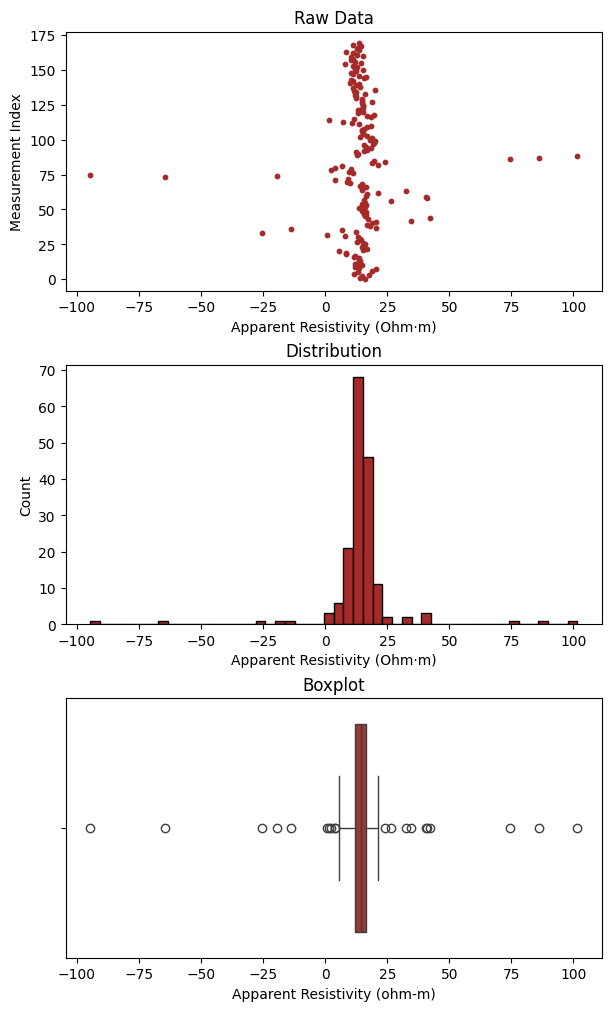

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6, 10), sharex=True, constrained_layout=True)

# 1st subplot: Scatter plot
axs[0].scatter(stg['resistivity'], stg.index, color='brown', s=10)
axs[0].set_title("Raw Data")
axs[0].set_ylabel("Measurement Index")
axs[0].set_xlabel("Apparent Resistivity (Ohm·m)")

# 2ndsubplot: Histogram
axs[1].hist(stg['resistivity'], bins=50, color='brown', edgecolor='black')
axs[1].set_title("Distribution")
axs[1].set_xlabel("Apparent Resistivity (Ohm·m)")
axs[1].set_ylabel("Count")

# 3rd subplot: Horizontal boxplot with resistivity on x-axis
sns.boxplot(x=stg['resistivity'].dropna(), color='brown', ax=axs[2])
axs[2].set_title("Boxplot")
axs[2].set_xlabel("Apparent Resistivity (ohm-m)")
axs[2].set_ylabel("")

# Force x-axis tick labels visible on all subplots
for ax in axs:
    ax.xaxis.set_tick_params(labelbottom=True)

plt.savefig("stg_resistivity_original.png", dpi=300)
plt.show()

We need to remove nan, negative and outliers values

In [31]:
# Filter the DataFrame for valid resistivity and error values
stg = stg[(stg['resistivity'] > 0) & (np.isfinite(stg['resistivity'])) &
          (stg['error_percent_tenths'] > 0) & (np.isfinite(stg['error_percent_tenths']))]

## Removing outliers
Q1 = stg['resistivity'].quantile(0.25)
Q3 = stg['resistivity'].quantile(0.75)
IQR = Q3 - Q1
# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Filter
stg = stg[(stg['resistivity'] >= lower_bound) & (stg['resistivity'] <= upper_bound)]

print("Filtered data")
display(stg.describe())

Filtered data


,record_num,date_time,V/I,error_percent_tenths,current_mA,resistivity,Ax,Ay,Az,Bx,...,Nz,ip_time_slot_ms,ip_time_constant,ip_slot1,ip_slot2,ip_slot3,ip_slot4,ip_slot5,ip_slot6,ip_total
count,150.000000,150,150.000000,150.000000,150.000000,150.000000,150.000000,150.0,150.0,150.000000,...,150.0,150.0,150.0,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,87.880000,2025-03-26 10:37:26.579999744,0.294612,33.673333,349.626667,14.228119,7.550000,0.0,0.0,8.930000,...,0.0,100.0,500.0,0.000153,0.000074,-0.000388,0.000165,-0.000045,0.000056,0.000015
min,1.000000,2025-03-26 10:07:56,0.002751,6.000000,262.000000,5.444140,0.000000,0.0,0.0,0.000000,...,0.0,100.0,500.0,-0.008127,-0.016618,-0.030840,-0.003793,-0.006943,-0.002900,-0.024536
25%,41.250000,2025-03-26 10:21:51.500000,0.038654,19.000000,320.250000,12.100925,3.375000,0.0,0.0,3.000000,...,0.0,100.0,500.0,-0.000171,-0.000107,-0.000092,-0.000125,-0.000061,-0.000054,-0.000417
50%,94.500000,2025-03-26 10:40:46,0.120696,28.000000,348.500000,14.579700,7.500000,0.0,0.0,7.500000,...,0.0,100.0,500.0,0.000160,0.000093,0.000058,0.000037,0.000038,0.000024,0.000395
75%,132.750000,2025-03-26 10:52:10.500000,0.311657,41.750000,374.750000,16.143800,10.500000,0.0,0.0,13.500000,...,0.0,100.0,500.0,0.000427,0.000277,0.000174,0.000135,0.000121,0.000103,0.001008
max,170.000000,2025-03-26 11:03:43,1.707630,133.000000,452.000000,21.437900,19.500000,0.0,0.0,22.500000,...,0.0,100.0,500.0,0.014657,0.025169,0.003284,0.030995,0.002432,0.006681,0.015983
std,51.373735,NaN,0.432244,22.406404,35.147541,3.202478,4.744743,0.0,0.0,6.833845,...,0.0,0.0,0.0,0.002080,0.002630,0.003305,0.002713,0.000888,0.000928,0.004010


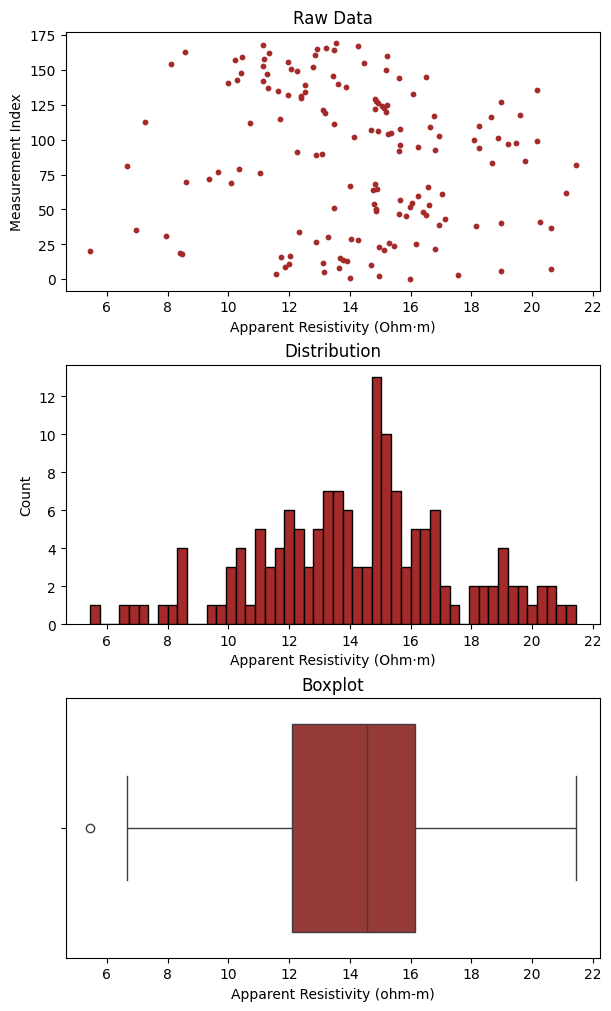

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(6, 10), sharex=True, constrained_layout=True)

# 1st subplot: Scatter plot
axs[0].scatter(stg['resistivity'], stg.index, color='brown', s=10)
axs[0].set_title("Raw Data")
axs[0].set_ylabel("Measurement Index")
axs[0].set_xlabel("Apparent Resistivity (Ohm·m)")

# 2ndsubplot: Histogram
axs[1].hist(stg['resistivity'], bins=50, color='brown', edgecolor='black')
axs[1].set_title("Distribution")
axs[1].set_xlabel("Apparent Resistivity (Ohm·m)")
axs[1].set_ylabel("Count")

# 3rd subplot: Horizontal boxplot with resistivity on x-axis
sns.boxplot(x=stg['resistivity'].dropna(), color='brown', ax=axs[2])
axs[2].set_title("Boxplot")
axs[2].set_xlabel("Apparent Resistivity (ohm-m)")
axs[2].set_ylabel("")

# Force x-axis tick labels visible on all subplots
for ax in axs:
    ax.xaxis.set_tick_params(labelbottom=True)

plt.savefig("stg_resistivity_filtered.png", dpi=300)
plt.show()

There are some other functions like:
- **fc2_ert.parse_cmd** to read CMD format
- **fc2_ert.parse_crs** to read CRS format

# ERT Analysis

In [12]:
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert
from pygimli.physics.ert import drawERTData

## Step 1: Geometry of the sensors

Extract unique electrode positions

In [13]:
electrodes = np.unique(np.concatenate([
    stg[['Ax']].values,  # Assuming 2D, use x-coordinates
    stg[['Bx']].values,
    stg[['Mx']].values,
    stg[['Nx']].values
], axis=0)).flatten()  # Ensure a 1D array
print(electrodes)

[ 0.   1.5  3.   4.5  6.   7.5  9.  10.5 12.  13.5 15.  16.5 18.  19.5
 21.  22.5]


Sort electrodes by x-coordinate for a 2D line, and add a new dimension because it expects a 2D array

In [14]:
electrodes = np.sort(electrodes)
sensors = np.column_stack((electrodes, np.zeros_like(electrodes)))  # Add y=0 for 2D

print("Electrodes shape:", electrodes.shape)
print("Electrodes (first few):", electrodes[:5])
print("Min electrode x:", min(electrodes))
print("Max electrode x:", max(electrodes))
print()
print("Sensors shape:", sensors.shape)

Electrodes shape: (16,)
Electrodes (first few): [0.  1.5 3.  4.5 6. ]
Min electrode x: 0.0
Max electrode x: 22.5

Sensors shape: (16, 2)


## Part 2: Assign values to the PyGIMLi ERT Data Container

Create a PyGIMLi data container and set sensor (electrode) positions

In [15]:
data = pg.DataContainerERT()
for i, pos in enumerate(sensors):
    data.createSensor(pos)
print(data)

Data: Sensors: 16 data: 0, nonzero entries: ['a', 'b', 'm', 'n']


Extract the A, B, M, N indices and the resistivity data

In [16]:
# Map electrode positions to indices
# key: the value in the dataframe. val: the index
electrode_dict = {x: i for i, x in enumerate(electrodes)}

# Convert electrode positions to indices for each electrode type
a = [electrode_dict[x] for x in stg['Ax']]
b = [electrode_dict[x] for x in stg['Bx']]
m = [electrode_dict[x] for x in stg['Mx']]
n = [electrode_dict[x] for x in stg['Nx']]

# Resistivity and error
r = [x for x in stg['resistivity']]
e = [x / 1000.0 for x in stg['error_percent_tenths']]

# Print results with clear formatting
print("\nElectrode Dictionary")
print(electrode_dict)

print("\nFirst 5 A electrode indices:", a[:5])
print("First 5 B electrode indices:", b[:5])
print("First 5 M electrode indices:", m[:5])
print("First 5 N electrode indices:", n[:5])

print("\nFirst 5 Apparent Resistivity values:", r[:5])
print("First 5 Error values (converted to float):", e[:5])


Electrode Dictionary
{0.0: 0, 1.5: 1, 3.0: 2, 4.5: 3, 6.0: 4, 7.5: 5, 9.0: 6, 10.5: 7, 12.0: 8, 13.5: 9, 15.0: 10, 16.5: 11, 18.0: 12, 19.5: 13, 21.0: 14, 22.5: 15}

First 5 A electrode indices: [1, 1, 1, 1, 1]
First 5 B electrode indices: [0, 0, 0, 0, 0]
First 5 M electrode indices: [2, 3, 4, 5, 6]
First 5 N electrode indices: [3, 4, 5, 6, 7]

First 5 Apparent Resistivity values: [15.965, 14.0114, 14.9679, 17.5715, 11.5712]
First 5 Error values (converted to float): [0.019, 0.032, 0.05, 0.058, 0.019]


Set the data and compute the geometric factor

In [18]:
data.resize(len(stg))  # Set number of measurements
data.set('a', a)  # Current electrode A indices
data.set('b', b)  # Current electrode B indices
data.set('m', m)  # Potential electrode M indices
data.set('n', n)  # Potential electrode N indices
data.set('rhoa', r)  # Apparent resistivity
data.set('err', e)  # Error as fraction
data['k'] = pg.physics.ert.createGeometricFactors(data, verbose=True)

# You can save the data for further use
pygimli_dataout = 'ert_pygimli.dat'
data.save(pygimli_dataout)

print()
print("Apparent resistivity values summary:")
print("Min:", np.min(data['rhoa']))
print("Max:", np.max(data['rhoa']))
print("Any positive?", np.any(data['rhoa'] > 0))
print("Any NaNs?", np.any(np.isnan(data['rhoa'])))
print("Any zeros?", np.any(data['rhoa'] == 0))

print()
print(f"Data is saved here: {pygimli_dataout}")

INFO:pyGIMLi:Calculate analytical flat earth geometric factors.
02/06/25 - 03:05:20 - pyGIMLi - INFO - Calculate analytical flat earth geometric factors.
INFO:pyGIMLi:Save RVector binary
02/06/25 - 03:05:20 - pyGIMLi - INFO - Save RVector binary
INFO:pyGIMLi:Cache stored: /root/.cache/pygimli/6652147040428651962
02/06/25 - 03:05:20 - pyGIMLi - INFO - Cache stored: /root/.cache/pygimli/6652147040428651962



Apparent resistivity values summary:
Min: 5.44414
Max: 21.4379
Any positive? True
Any NaNs? False
Any zeros? False

Data is saved here: ert_pygimli.dat


## Part 3: Inversion

### Unstructured data

#### Geometry for the inversion

In [19]:
# Create a geometry for the inversion
x_min = np.min(electrodes) - 10  # Extend 10 units beyond min electrode
x_max = np.max(electrodes) + 10  # Extend 10 units beyond max electrode
y_min = -10  # Depth of the model
y_max = 0    # Surface

print(f"World bounds: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")

World bounds: x_min=-10.0, x_max=32.5, y_min=-10, y_max=0


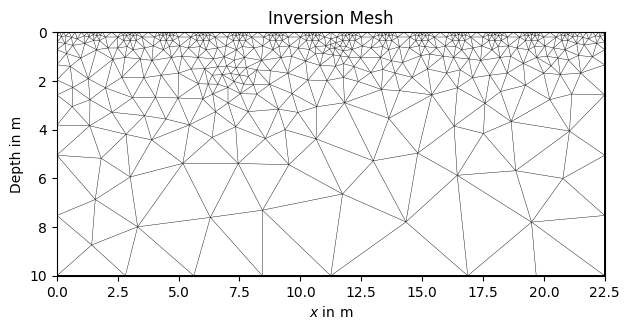

In [33]:
world = mt.createWorld(start=[x_min, y_max], end=[x_max, y_min],
                        worldMarker=True)

# Add electrodes to the geometry for mesh refinement
for p in data.sensors():
    world.createNode(p)
    world.createNode(p - [0, 0.1])  # Refine near electrodes

# Create a mesh for inversion
mesh = mt.createMesh(world, quality=34)

# Take a look at the mesh and the resistivity distribution
pg.show(mesh, showMesh=True)
plt.title("Inversion Mesh")
plt.savefig("unstructured_mesh.png", dpi=300)
plt.show()

#### Inversion

INFO:pyGIMLi:Found 2 regions.
02/06/25 - 03:07:30 - pyGIMLi - INFO - Found 2 regions.
INFO:pyGIMLi:(ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 03:07:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
INFO:pyGIMLi:Found 2 regions.
02/06/25 - 03:07:30 - pyGIMLi - INFO - Found 2 regions.
INFO:pyGIMLi:(ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 03:07:30 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
INFO:pyGIMLi:Creating forward mesh from region infos.
02/06/25 - 03:07:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (H2) to solve forward task.
02/06/25 - 03:07:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
INFO:pyGIMLi:Mesh for forward task: Mesh: Nodes: 933 Cells: 1744 Boundaries: 1368
02/06/25 - 03:07:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 933 Cells: 1744 B

Inversion stopped with chi² = 13.334


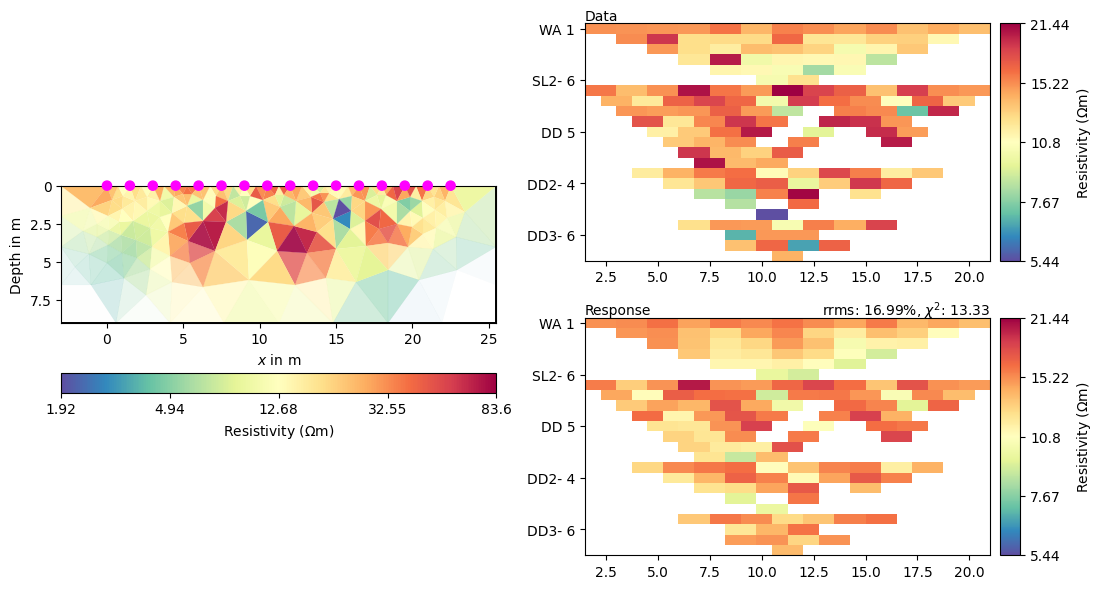

In [21]:
lamb = 1  # Regularization parameter

# Initialize ERTManager and perform inversion
mgr = ert.ERTManager(pygimli_dataout)
unstructured_model = mgr.invert(lam=lamb, verbose=False)

# Check inversion quality
print(f"Inversion stopped with chi² = {mgr.inv.chi2():.3f}")

#  Visualize results

#ax,cb = pg.show(mgr.paraDomain, unstructured_model, label='Resistivity (Ohm·m)', cMap='Spectral_r',
#        logScale=True)

fig = mgr.showResultAndFit();
fig.savefig("unstructured_model.png",dpi=300)

### Structured data: Simple Grid


#### Geometry for the inversion

In [22]:
x_min = np.min(electrodes) - 10  # Extend 10 units beyond min electrode
x_max = np.max(electrodes) + 10  # Extend 10 units beyond max electrode
x_points = 10

y_min = -10  # Depth of the model
y_max = 0    # Surface
y_points = 10

x_linspace = np.linspace(start=x_min, stop=x_max , num=33)
y_space = -pg.cat([0], pg.utils.grange(y_max+0.0001, y_min*-1, n=y_points))[::-1]

print(f"World bounds: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")
print()
print(f"x_linspace: {x_linspace}")
print(f"y_space: {y_space}")

World bounds: x_min=-10.0, x_max=32.5, y_min=-10, y_max=0

x_linspace: [-10.        -8.671875  -7.34375   -6.015625  -4.6875    -3.359375
  -2.03125   -0.703125   0.625      1.953125   3.28125    4.609375
   5.9375     7.265625   8.59375    9.921875  11.25      12.578125
  13.90625   15.234375  16.5625    17.890625  19.21875   20.546875
  21.875     23.203125  24.53125   25.859375  27.1875    28.515625
  29.84375   31.171875  32.5     ]

y_space: 11 [-10.0, -8.8889, -7.777799999999999, -6.6667, -5.5556, -4.4445, -3.3334, -2.2223, -1.1112, -0.0001, -0.0]


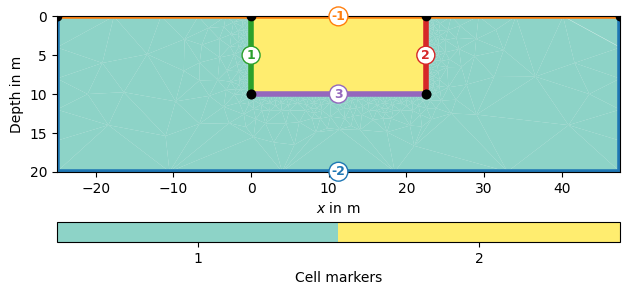

In [35]:
# custom grid
x_padding = 25
y_padding = 10

simple_inversionDomain = pg.createGrid(x=x_linspace,
                                y=y_space,
                                marker=2)
simple_grid = pg.meshtools.appendTriangleBoundary(simple_inversionDomain, marker=1,
                                           xbound=x_padding, ybound=y_padding)
pg.show(simple_grid, markers=True)
plt.savefig("structured_simple_mesh.png", dpi=300)
plt.show()

#### Inversion

INFO:pyGIMLi:Found 2 regions.
02/06/25 - 03:08:41 - pyGIMLi - INFO - Found 2 regions.
INFO:pyGIMLi:(ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 03:08:41 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
INFO:pyGIMLi:Creating forward mesh from region infos.
02/06/25 - 03:08:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (H2) to solve forward task.
02/06/25 - 03:08:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
INFO:pyGIMLi:Mesh for forward task: Mesh: Nodes: 1978 Cells: 2556 Boundaries: 2296
02/06/25 - 03:08:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 1978 Cells: 2556 Boundaries: 2296
INFO:pyGIMLi:Use median(data values)=14.579699999999999
02/06/25 - 03:08:41 - pyGIMLi - INFO - Use median(data values)=14.579699999999999


Inversion stopped with chi² = 15.812


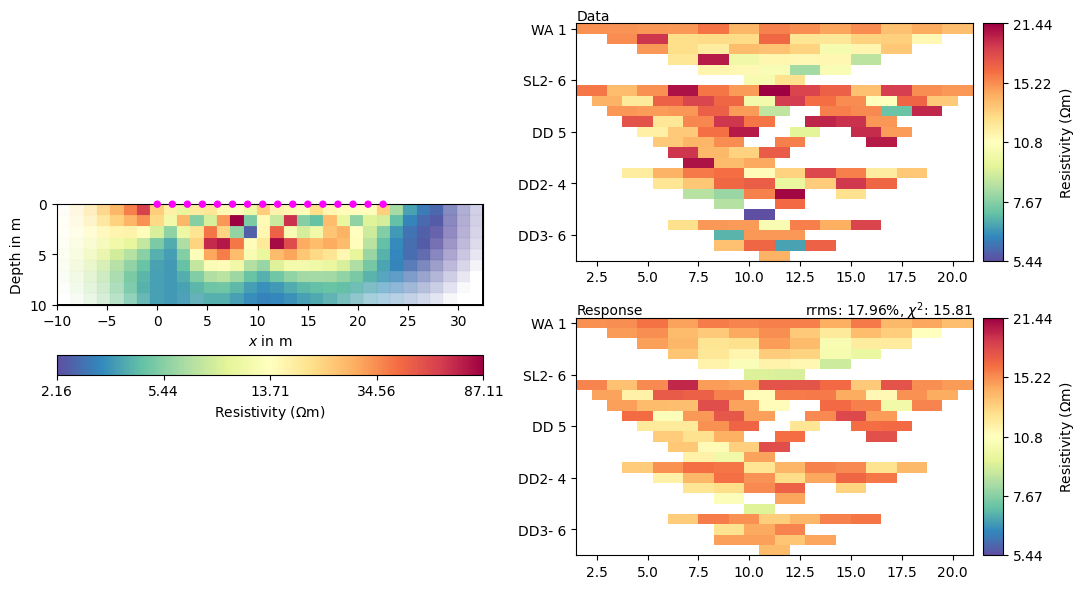

In [24]:
lamb = 1  # Regularization parameter

simple_mgr = ert.ERTManager(pygimli_dataout)

structured_simple_model = simple_mgr.invert(mesh=simple_grid, lam=lamb, verbose=False)

print(f"Inversion stopped with chi² = {simple_mgr.inv.chi2():.3f}")
fig = simple_mgr.showResultAndFit();
fig.savefig("structured_simple_model.png",dpi=300)

### Structured data: Robust Grid

#### Geometry for the inversion

In [25]:
x_min = np.min(electrodes)
x_max = np.max(electrodes)
x_points = 40

y_min = -10  # Depth of the model
y_max = 0    # Surface
y_points = 30

x_linspace = np.linspace(start=x_min, stop=x_max , num=33)
y_space = -pg.cat([0], pg.utils.grange(y_max+0.0001, y_min*-1, n=y_points))[::-1]

print(f"World bounds: x_min={x_min}, x_max={x_max}, y_min={y_min}, y_max={y_max}")
print()
print(f"x_linspace: {x_linspace}")
print(f"y_space: {y_space}")

World bounds: x_min=0.0, x_max=22.5, y_min=-10, y_max=0

x_linspace: [ 0.        0.703125  1.40625   2.109375  2.8125    3.515625  4.21875
  4.921875  5.625     6.328125  7.03125   7.734375  8.4375    9.140625
  9.84375  10.546875 11.25     11.953125 12.65625  13.359375 14.0625
 14.765625 15.46875  16.171875 16.875    17.578125 18.28125  18.984375
 19.6875   20.390625 21.09375  21.796875 22.5     ]

y_space: 31 [-10.0, -9.655175862068965, -9.31035172413793, -8.965527586206896, -8.620703448275862, -8.275879310344827, -7.931055172413793, -7.586231034482759, -7.241406896551724, -6.89658275862069, -6.551758620689656, -6.206934482758621, -5.862110344827586, -5.517286206896552, -5.172462068965517, -4.827637931034483, -4.482813793103448, -4.137989655172413, -3.7931655172413796, -3.4483413793103455, -3.103517241379311, -2.7586931034482762, -2.4138689655172416, -2.069044827586207, -1.7242206896551726, -1.379396551724138, -1.0345724137931034, -0.689748275862069, -0.3449241379310345, -0.0001, -0.

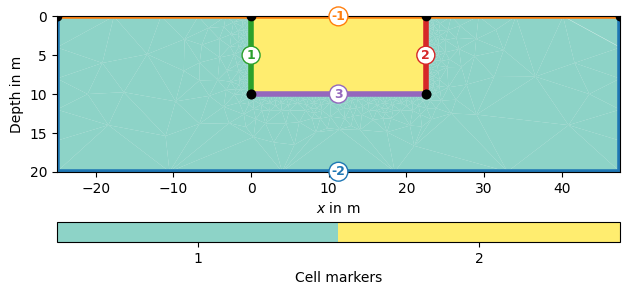

In [36]:
# custom grid
x_padding = 25
y_padding = 10

robust_inversionDomain = pg.createGrid(x=x_linspace,
                                y=y_space,
                                marker=2)
robust_grid = pg.meshtools.appendTriangleBoundary(robust_inversionDomain, marker=1,
                                           xbound=x_padding, ybound=y_padding)
pg.show(robust_grid, markers=True)
plt.savefig("structured_robust_mesh.png", dpi=300)

#### Inversion

INFO:pyGIMLi:Found 2 regions.
02/06/25 - 03:09:38 - pyGIMLi - INFO - Found 2 regions.
INFO:pyGIMLi:(ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 03:09:38 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
INFO:pyGIMLi:Creating forward mesh from region infos.
02/06/25 - 03:09:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
INFO:pyGIMLi:Creating refined mesh (H2) to solve forward task.
02/06/25 - 03:09:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
INFO:pyGIMLi:Mesh for forward task: Mesh: Nodes: 5258 Cells: 6556 Boundaries: 5936
02/06/25 - 03:09:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 5258 Cells: 6556 Boundaries: 5936
INFO:pyGIMLi:Use median(data values)=14.579699999999999
02/06/25 - 03:09:38 - pyGIMLi - INFO - Use median(data values)=14.579699999999999


Inversion stopped with chi² = 24.751


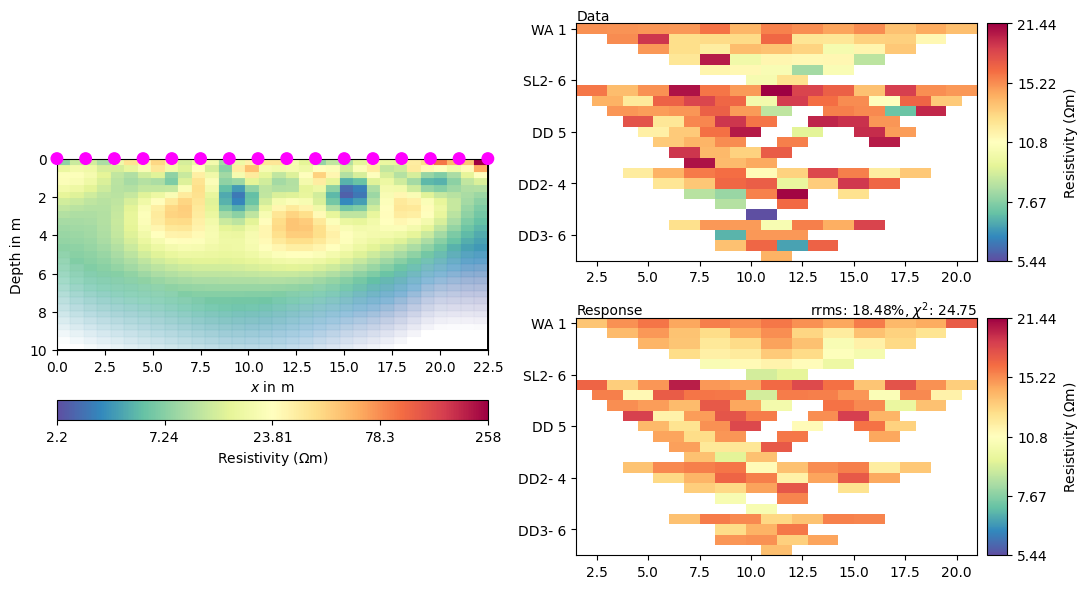

In [27]:
lamb = 1  # Regularization parameter

robust_mgr = ert.ERTManager(pygimli_dataout)

structured_robust_model = robust_mgr.invert(mesh=robust_grid, lam=lamb, verbose=False)

print(f"Inversion stopped with chi² = {robust_mgr.inv.chi2():.3f}")
fig = robust_mgr.showResultAndFit();
fig.savefig("structured_robust_model.png",dpi=300)

**Well Done!** 🙂 🎉

You can find more material in the pygimli library: https://www.pygimli.org/documentation.html

Let us know any questions you have.

emmanuel.castillotaborda@utallas.edu & nadine.igonin@utdallas.edu